I have bike rental dataset. The dataset contains temperature information and the bike rental for the given temperature. I need to build a Simple Linear Regression model to predict the bike rental, given a temperature.

### Step1: Import dataset and do necessary cleaning

In [101]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import pickle


In [102]:
#Load the dataset
dataset = pd.read_csv('bike_rental (1).csv')
print(dataset.shape)
print(dataset.dtypes)

(8760, 3)
Date                  object
Rented Bike Count      int64
Temperature(C)       float64
dtype: object


In [103]:
#Drop Date Column
dataset = dataset.drop('Date', axis=1)
dataset.head()

,Rented Bike Count,Temperature(C)
0,254,-5.2
1,204,-5.5
2,173,-6.0
3,107,-6.2
4,78,-6.0


### Step 2: Model Building

In [104]:
#Define x and y variable
x = dataset.iloc[:,1].values #First column of the dataframe ie Year of Experience
print(x)
print(x.shape)
print(x.ndim)

y = dataset.iloc[:,0].values #Second column of the dataframe ie Salary 
print(y.shape)
print(y.ndim)


#Create Train and Test Datasets with 8:2 ratio

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size = 2/10, random_state = 1)
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

#Convert x variables to 2D if necessary
x_train = x_train.reshape(-1, 1)
x_test = x_test.reshape(-1, 1)
#Fit a Simple Linear Regression to the Training set
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)
#Find the model parameters
r_sq = regressor.score(x_train, y_train)
print('coefficient of determination:', r_sq)
print('intercept:', regressor.intercept_)
print('slope:', regressor.coef_)

[-5.2 -5.5 -6.  ...  2.6  2.1  1.9]
(8760,)
1
(8760,)
1
coefficient of determination: 0.291281054803077
intercept: 331.47053384856684
slope: [28.95456136]


### Step 3: Model Evaluation 

In [105]:
#Find the RMSE and r2 of the model
y_pred = regressor.predict(x_test)
print('predicted response:', y_pred, sep='\n')

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE:', rmse)

predicted response:
[ 858.4435506  1011.9027258   774.47532265 ...  623.91160358  956.88905922
  638.38888426]
RMSE: 543.6190668935028


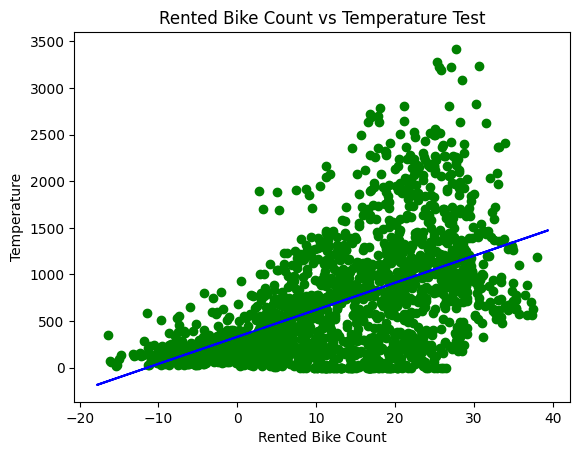

In [106]:
#Plot a scatter plot with test dataset and the trained model
plt.scatter(x_test, y_test, color = 'green')
plt.plot(x_train, regressor.predict(x_train), color = 'blue')
plt.title('Rented Bike Count vs Temperature Test')
plt.xlabel('Rented Bike Count')
plt.ylabel('Temperature')
plt.show()

### Step 4: Model Generalization

In [107]:
#Save model to disk
pickle.dump(regressor, open('model.pkl','wb'))

In [109]:
#Make prediction using saved model on Temperature -6
loaded_model = pickle.load(open('model.pkl', 'rb'))
prediction = loaded_model.predict([[-6]])
print(prediction)

[157.74316569]
